# Sharing data between steps

* To share information between steps frequently.
* We need data available globally.
* But Python keeps variables alive only in the functions they are defined, unless the use of "global".
* Behave provides a feature that allows us to do just that.
    * No need to declare global variables.
    * Plus global variables are only good in one file.

For example:

```gherkin
Feature: Display email

Scenario: Email should display when logged in

    Given I create a random email
    When I login with the random email
    Then I should see the email on the page
```

* A random email is generated on the first step.
* How can we use that email on the next step to login?
* **Need a way to store the value and it should persist between steps**.


# `context` variable

* The variable **`context`** is an instance of a class and is used to store contextual data during the test run.
* To store value globally just use: `context.<variable_name> = value`
* Applicable for steps within **Scenario** only.

**Example**:
* store value for **rand_eamil**: `context.rand_email = 'test_user@test.com'`
* use the `rand_email` in a different function.
  ```
  >>> print context.rand_email
  >>> test_user@test.com
  >>> email_field.send_keys(context.rand_email)
  ```

**Important Notes**:
* Behave uses `context` to store lots of information used for running tests (**do not use those names**)
* Examples:
    * `context.feature` stores the Feature.
    * `context.scenario` stores the Scenarios.
* Avoid such keywords (refer to API documentation)
* Check if the variable you want to use is being used by `behave` by doing: **`>>> your_var in context`**
* Note that the `context` variable can share data only between steps within a scenario.
* **It cannot share data between scenarios.**

# Working with `context` variable

* The context variable is passed into every step definition, so all of the step functions that you write will have a variable called context as the first argument.
* You can think of it as a **container** or a bag to put stuff in, take stuff out, and pass it around.
* **It exists for the duration of the entire feature file and all of the steps.**
* **Every step called from the feature file will share the same context.**
* That lifespan makes context useful for passing information from one step to the next--or any future step that might need that information.

```python

@given("the server is started")
def step_impl(context):
    context.client = app.test_client()

@when("I visit the 'home page'")
def step_impl(context):
    context.response = context.client.get('/')

@then("I should see '{message}'")
def step_impl(context, message):
    assert message in str(context.response.data)

```

# Example: clipboard simulation using `context` variable

Occasionally, you need to copy information from one field and paste it into another.

But unfortunately, **Selenium doesn’t support clipboards.**

This is a little trick that is used to simulate copy-and-paste using a clipboard.

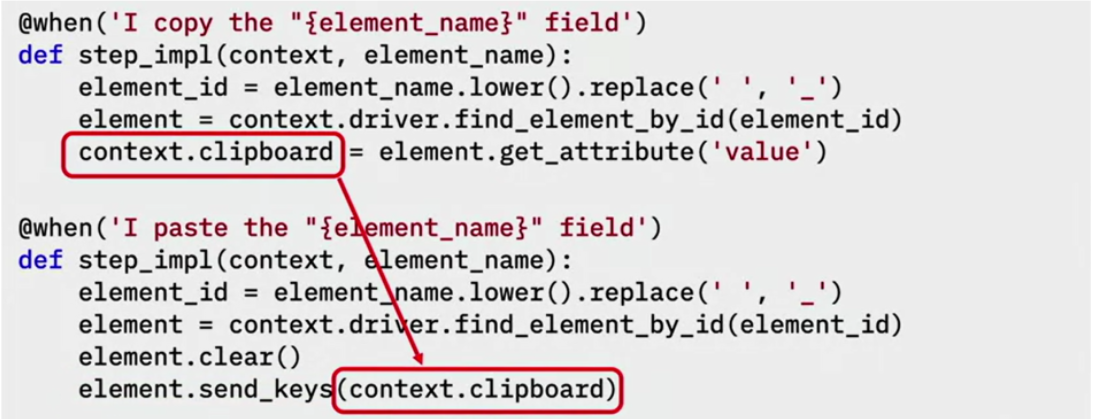